In [1]:
# Imports all packages necessary or useful

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [2]:
# Reads our medical_clean data csv file for analysis

df = pd.read_csv(r'C:\Users\caleb\OneDrive\Desktop\WGU\D212 - Data Mining II\medical_clean.csv')

In [3]:
# Profiles our csv file following importing data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [4]:
# Gives us a snapshot of values contained in each of our variables

pd.set_option("display.max_columns", 0)
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [5]:
# Detects any duplicated observations in our data set

df.duplicated().value_counts()

False    10000
dtype: int64

In [6]:
# Detects any null values in our data set

df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [7]:
# Filters appropriate variable types for PCA by exclusion

dfex = df.select_dtypes(exclude = 'object')
dfex

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,35621,34.34960,-86.72508,2951,1,53,86575.93,19.141466,6,0,0,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,32446,30.84513,-85.22907,11303,3,51,46805.99,18.940352,4,2,1,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,57110,43.54321,-96.63772,17125,3,53,14370.14,18.057507,4,1,0,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,56072,43.89744,-93.51479,2162,0,78,39741.49,16.576858,4,1,0,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,23181,37.59894,-76.88958,5287,1,22,1209.56,17.439069,5,0,2,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,27563,36.42886,-78.23716,4762,2,25,45967.61,16.980860,4,2,1,51.561220,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9996,9997,8340,39.43609,-74.87302,1251,4,87,14983.02,18.177020,5,0,0,68.668240,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9997,9998,37171,36.36655,-87.29988,532,3,45,65917.81,17.129070,4,2,0,70.154180,8276.481000,15281.210000,3,3,3,4,4,2,3,2
9998,9999,57775,44.10354,-102.01590,271,3,43,29702.32,19.910430,5,2,1,63.356900,7644.483000,7781.678000,5,5,3,4,4,3,4,3


In [8]:
# Lists the variables for the above exclusive data set

dfex.columns

Index(['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age',
       'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [9]:
# Filters appropriate variable types for PCA by inclusion

dfinc = df.select_dtypes('number')
dfinc

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,35621,34.34960,-86.72508,2951,1,53,86575.93,19.141466,6,0,0,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,32446,30.84513,-85.22907,11303,3,51,46805.99,18.940352,4,2,1,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,57110,43.54321,-96.63772,17125,3,53,14370.14,18.057507,4,1,0,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,56072,43.89744,-93.51479,2162,0,78,39741.49,16.576858,4,1,0,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,23181,37.59894,-76.88958,5287,1,22,1209.56,17.439069,5,0,2,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,27563,36.42886,-78.23716,4762,2,25,45967.61,16.980860,4,2,1,51.561220,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9996,9997,8340,39.43609,-74.87302,1251,4,87,14983.02,18.177020,5,0,0,68.668240,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9997,9998,37171,36.36655,-87.29988,532,3,45,65917.81,17.129070,4,2,0,70.154180,8276.481000,15281.210000,3,3,3,4,4,2,3,2
9998,9999,57775,44.10354,-102.01590,271,3,43,29702.32,19.910430,5,2,1,63.356900,7644.483000,7781.678000,5,5,3,4,4,3,4,3


In [10]:
# Lists the variables for the above inclusive data set

dfinc.columns

Index(['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age',
       'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [11]:
# Selects appropriate variables for PCA based on our research question
# Either of the above filter sets work; each contains 23 variables to choose from as indicated
# We can use the listed columns to easily copy and paste columns we would like to drop/remove from analysis

dftask = dfinc.drop(['CaseOrder', 'Zip', 'Lat', 'Lng', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis = 1)
dftask.columns

Index(['Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge',
       'Additional_charges'],
      dtype='object')

In [12]:
# Views our reduced dataset
# Notably, this tells us we are working with 11 columns

dftask

,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges
0,2951,1,53,86575.93,19.141466,6,0,0,10.585770,3726.702860,17939.403420
1,11303,3,51,46805.99,18.940352,4,2,1,15.129562,4193.190458,17612.998120
2,17125,3,53,14370.14,18.057507,4,1,0,4.772177,2434.234222,17505.192460
3,2162,0,78,39741.49,16.576858,4,1,0,1.714879,2127.830423,12993.437350
4,5287,1,22,1209.56,17.439069,5,0,2,1.254807,2113.073274,3716.525786
...,...,...,...,...,...,...,...,...,...,...,...
9995,4762,2,25,45967.61,16.980860,4,2,1,51.561220,6850.942000,8927.642000
9996,1251,4,87,14983.02,18.177020,5,0,0,68.668240,7741.690000,28507.150000
9997,532,3,45,65917.81,17.129070,4,2,0,70.154180,8276.481000,15281.210000
9998,271,3,43,29702.32,19.910430,5,2,1,63.356900,7644.483000,7781.678000


In [13]:
# Scales our data
# We will utilize StandardScaler vs RobustScaler for our data
# StandardScaler sets data mean to 0 and STD to 1, accounts for outliers
# RobustScaler uses IQR to normalize data, is not sensitive to outliers
# We will use StandardScaler for this assessment

stdscale = StandardScaler()

In [14]:
# Scales our reduced data set for PCA

scaled_data = pd.DataFrame(stdscale.fit_transform(dftask), columns = dftask.columns)
scaled_data

,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges
0,-0.473168,-0.507129,-0.024795,1.615914,0.583603,0.944647,-0.993387,-0.634713,-0.907310,-0.727185,0.765005
1,0.090242,0.417277,-0.121706,0.221443,0.483901,-0.967981,0.990609,0.956445,-0.734595,-0.513228,0.715114
2,0.482983,0.417277,-0.024795,-0.915870,0.046227,-0.967981,-0.001389,-0.634713,-1.128292,-1.319983,0.698635
3,-0.526393,-0.969332,1.186592,-0.026263,-0.687811,-0.967981,-0.001389,-0.634713,-1.244503,-1.460517,0.009004
4,-0.315586,-0.507129,-1.526914,-1.377325,-0.260366,-0.011667,-0.993387,2.547602,-1.261991,-1.467285,-1.408991
...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.351002,-0.044926,-1.381548,0.192047,-0.487525,-0.967981,0.990609,0.956445,0.650217,0.705765,-0.612461
9996,-0.587847,0.879480,1.622691,-0.894380,0.105476,-0.011667,-0.993387,-0.634713,1.300475,1.114312,2.380307
9997,-0.636349,0.417277,-0.412438,0.891569,-0.414049,-0.967981,0.990609,-0.634713,1.356958,1.359597,0.358695
9998,-0.653956,0.417277,-0.509349,-0.378271,0.964820,-0.011667,0.990609,0.956445,1.098585,1.069727,-0.787624


In [15]:
# Initializes an array for our PCA matrix

pca = PCA(n_components = 11)
pca_model = pd.DataFrame(pca.fit_transform(scaled_data), columns = dftask.columns)
pca_model

,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges
0,-1.147167,0.617682,0.757300,0.778441,0.807202,-1.225623,-0.351353,0.415103,-1.407094,-0.579698,0.101410
1,-0.802145,0.564164,-0.480631,-0.010501,-0.020209,0.732813,0.990166,1.049424,0.676316,-0.585516,0.124755
2,-1.623198,0.666891,-0.551251,-0.355427,-0.199758,1.276599,-0.770839,-0.125473,0.163873,-0.499735,-0.162620
3,-1.848100,1.026724,-0.273413,-1.473269,0.147053,-0.325996,-0.677782,0.326153,-0.110276,0.827998,-0.118247
4,-2.074058,-1.800730,1.176226,-0.981724,-1.962856,0.581654,1.833191,-0.585211,-0.219095,-0.096243,-0.134175
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.778246,-1.485882,-0.394542,-0.877056,0.139919,0.083097,1.035866,0.689238,0.912895,-0.539013,0.025837
9996,2.071098,2.608907,-0.270663,-0.171107,0.207145,0.730503,-0.338799,-1.102118,-1.057277,-0.546596,-0.175630
9997,1.851053,-0.260849,-0.984698,-0.559132,1.459558,-0.160084,0.033071,0.658093,0.443190,-0.539923,-0.020029
9998,1.417077,-0.994919,-1.070733,0.441788,-0.494352,0.092558,1.447683,0.245177,0.124652,0.197209,-0.008476


In [16]:
# Creates our scaled PCA array as on object

dfpca = pd.DataFrame(pca.components_.T, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'], index = dftask.columns)
dfpca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Population,0.024451,-0.028354,0.421855,0.370209,-0.235896,0.349305,-0.479600,0.222540,0.475576,0.014389,-0.000930
Children,0.034520,0.017410,-0.096731,0.349000,0.518807,0.626415,0.279715,-0.352459,0.057534,0.003628,-0.000922
Age,0.084872,0.700762,0.023524,-0.017159,0.006689,-0.003294,-0.024529,0.008834,-0.014554,0.706573,0.026245
Income,-0.020184,-0.019046,0.325252,0.196995,0.658378,-0.322788,0.081858,0.554281,-0.055190,0.002259,0.001296
VitD_levels,-0.002039,0.020437,-0.359913,0.572300,-0.328573,0.133583,0.092902,0.414384,-0.486165,-0.002326,-0.001492
Doc_visits,-0.006889,0.015447,0.213144,0.593922,-0.106642,-0.545545,0.072843,-0.535509,0.021685,0.001013,-0.001099
Full_meals_eaten,-0.020703,0.032146,-0.603613,0.129858,0.030406,-0.228783,0.172002,0.184049,0.707448,0.010803,-0.001629
vitD_supp,0.025366,0.014522,0.407015,-0.069521,-0.348283,0.106250,0.799985,0.161924,0.172815,0.000433,-0.000599
Initial_days,0.700222,-0.090235,-0.018411,-0.005489,0.006565,-0.034373,-0.005664,0.009234,-0.004640,0.031468,-0.706275
TotalCharge,0.701358,-0.079643,-0.019610,-0.002230,0.004801,-0.033307,-0.005328,0.009057,-0.002110,-0.031443,0.706490


In [17]:
# Explains the variance accounted for by each component in order of appearance

exp_var = pca.explained_variance_ratio_
exp_var

array([0.18136305, 0.15593151, 0.09552936, 0.09266952, 0.09149236,
       0.09063846, 0.08974751, 0.08822797, 0.08756754, 0.02576782,
       0.00106489])

In [18]:
# Describes the progressive cumulative summary of explained variance 

np.cumsum(exp_var)

array([0.18136305, 0.33729456, 0.43282392, 0.52549344, 0.6169858 ,
       0.70762426, 0.79737177, 0.88559974, 0.97316728, 0.99893511,
       1.        ])

In [19]:
# Sums the total variance for our components

totalvar = np.sum(exp_var)
totalvar

0.9999999999999999

In [20]:
# Creates a range to call for our PCA values
# '+ 1' avoids our index starting at 0

pcomp = np.arange(pca.n_components) + 1
pcomp

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

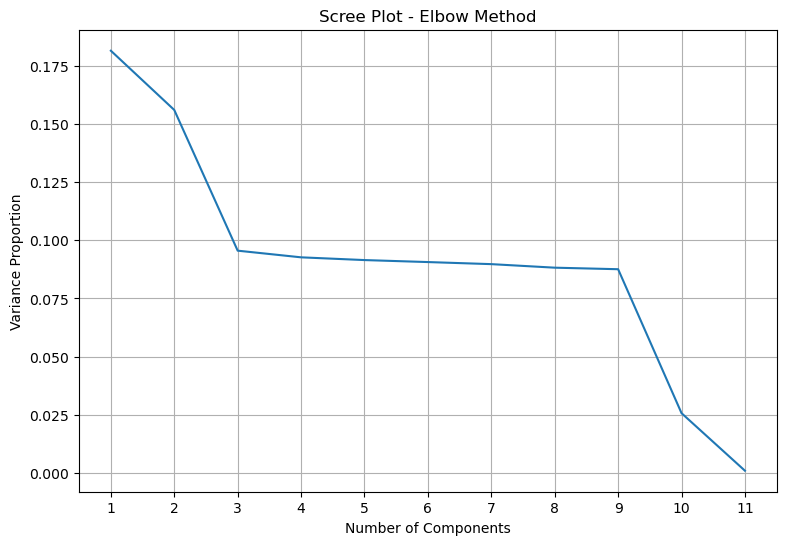

In [21]:
# Creates a scree plot using the elbow method that includes variance proportion explained by each component
# Aims to capture 80% of the variance in data

plt.figure(figsize = (9,6))
plt.plot(pcomp, exp_var)
plt.title('Scree Plot - Elbow Method')
plt.xlabel('Number of Components')
plt.ylabel('Variance Proportion')
plt.xticks(ticks=pcomp)
plt.grid()
plt.show()

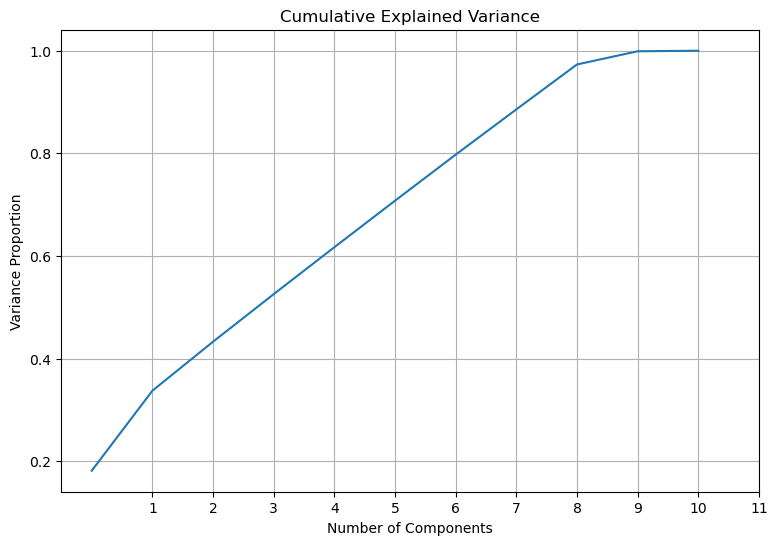

In [22]:
# Creates a scree plot to visualize the cumulative variance accounted for by each principal component in succession
# Aims to capture 80% of the variance in the data
# X axis actual value should add 1 to accurately describe variance explained (Consistent with cumsum(), 80% variance captured at ~7 components)

plt.figure(figsize = (9,6))
plt.plot(np.cumsum(exp_var))
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Variance Proportion')
plt.xticks(ticks=pcomp)
plt.grid()
plt.show()

In [23]:
# This code helps us select our principal components by calculating our covariance matrix

cov_matrix = np.dot(scaled_data.T, scaled_data) / dftask.shape[0]

In [24]:
# This assigns our eigenvalues to our eigenvectors

eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

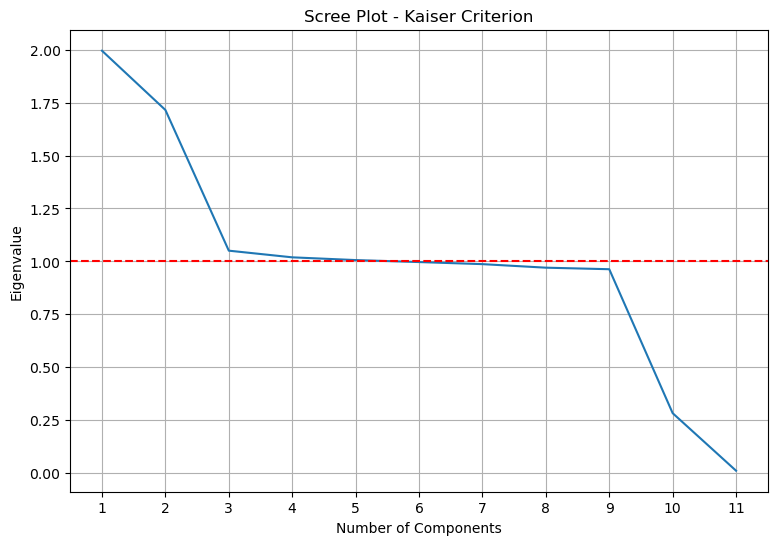

In [25]:
# Creates a scree plot using the Kaiser rule that includes eigenvalues

plt.figure(figsize = (9,6))
plt.plot(pcomp, eigenvalues)
plt.title('Scree Plot - Kaiser Criterion')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color="red", linestyle='--')
plt.xticks(ticks=pcomp)
plt.grid()
plt.show()

In [26]:
# Views our eigenvalues to determine significant values (components with eigenvalue > 1)
# Per the Kaiser criterion, we would retain 5 components

eigenvalues

[1.9949935935230694,
 1.715246595563145,
 1.0508229638439572,
 1.019364683510926,
 1.0064160049906008,
 0.9970230298072005,
 0.987222594759784,
 0.9705076791555518,
 0.9632429730859451,
 0.2834460431738246,
 0.011713838586060545]